In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = torch.rand(5,3)
print(x)
print(x.shape)
print(type(x))
# neural networks accept only tensor of type long or float
print(x.dtype)
x = torch.rand(5,3)
print(x)
print(x.dtype)
print(x.size())
# tutti i tensori devono risiedere nello stesso device
# si richiede quindi che per la conversione a numpy il 
# il tensore stia sulla cpu
y=x.numpy()
y = x.cpu().numpy()
print(y)

# l'operazione di view non è inplace, i.e. x rimane identico,
# ma x e y condividono i valori
w = x.view(-1,15)
print(w.shape)
print(x.shape)

Dal seguente esempio possiamo notare che, la view effettua una semplice riorganizzazione del tensore, i dati sottostanti rimangono condivisi

In [ ]:
x = torch.rand(2,2)
y = x.view(-1,4)

x[0,1]=5
print(x)
print(y)

Anche per la reshape, tuttavia, non è sicuro

In [ ]:
x = torch.rand(2,2)
y = x.reshape(-1,4)

x[0,1] = 5
print(x)
print(y)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

L'operazione di to(device) è ovviamente dispendiosa, bisogna minimizzare lo spostamento

In [ ]:
# x = torch.rand(5,3)
# x.to('cuda')
# x.to('cpu')
# y = y.cuda()

In [ ]:
# il requires_grad indica che si può effettuare l'allenamento
# sui pesi
x = torch.ones(2,2,requires_grad=True)
y = x+2
print(x)
print(y)

In [ ]:
z = torch.pow(y,2)
t = 3*z
out = z.mean()
# grad_fn indica l'istruzione da usare per il calcolo delle derivate parziali
print(z.grad_fn)
print(t.grad_fn)
print(out.grad_fn)


In [ ]:
out.backward()

In [ ]:
x.grad

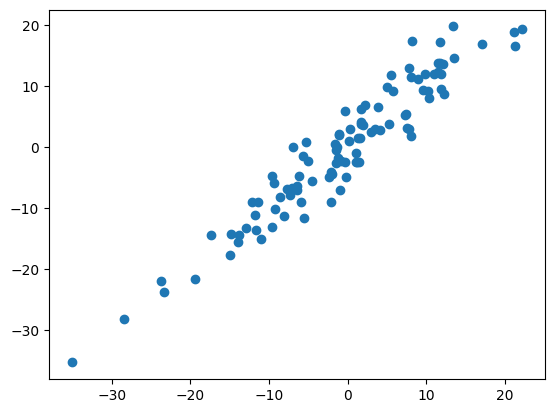

In [2]:
# create random dataset for linear regression
x_train = torch.randn(100,1)*10
y_train = x_train + 3*torch.randn(100,1)

plt.plot(x_train.numpy(),y_train.numpy(),'o')

In [3]:
model = nn.Linear(1,1)
criterion = nn.MSELoss()

lr = 1e-4
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
NUM_EPOCHS = 1000


In [4]:
for i in range(NUM_EPOCHS):
    # forward pass
    y_pred = model(x_train)
    loss = criterion(y_train,y_pred)
    if i%100 == 0:
        print(f'epoch {i+1}: loss = {loss.item():.4f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch 1: loss = 275.1013
epoch 101: loss = 13.6038
epoch 201: loss = 10.5115
epoch 301: loss = 10.4729
epoch 401: loss = 10.4704
epoch 501: loss = 10.4685
epoch 601: loss = 10.4666
epoch 701: loss = 10.4648
epoch 801: loss = 10.4631
epoch 901: loss = 10.4615


In [5]:
preds_y = model(x_train).detach().numpy()

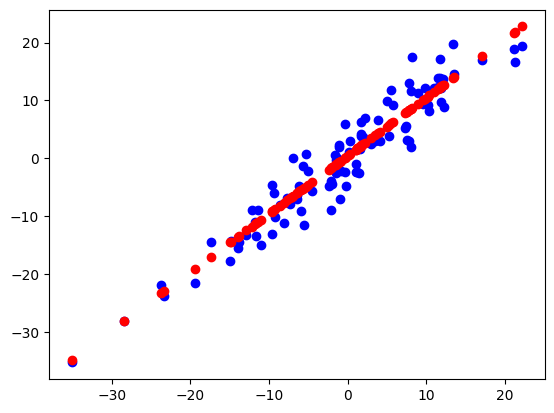

In [6]:
# plot the real y and the predicted y
plt.plot(x_train.numpy(),y_train.numpy(),'o',c='b')   
plt.plot(x_train.numpy(),preds_y,'o',c='r')

epoch 1: loss = 0.7455
epoch 101: loss = 0.7420
epoch 201: loss = 0.7386
epoch 301: loss = 0.7351
epoch 401: loss = 0.7316
epoch 501: loss = 0.7281
epoch 601: loss = 0.7247
epoch 701: loss = 0.7212
epoch 801: loss = 0.7177
epoch 901: loss = 0.7142


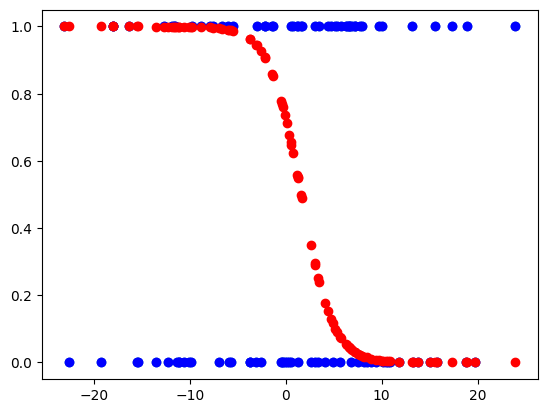

In [7]:
# create a logistic model for the same dataset
# create random dataset for linear regression
x_train = torch.randn(100,1)*10
y_train = torch.cat((torch.zeros(50,1),torch.ones(50,1)),dim=0)

plt.plot(x_train.numpy(),y_train.numpy(),'o')

model = nn.Linear(1,1)
criterion = nn.BCEWithLogitsLoss()

lr = 1e-4
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
NUM_EPOCHS = 1000


for i in range(NUM_EPOCHS):
    # forward pass
    y_pred = model(x_train)
    loss = criterion(y_train,y_pred)
    if i%100 == 0:
        print(f'epoch {i+1}: loss = {loss.item():.4f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

preds_y = torch.sigmoid(model(x_train)).detach().numpy()

# plot the real y and the predicted y
plt.plot(x_train.numpy(),y_train.numpy(),'o',c='b')
plt.plot(x_train.numpy(),preds_y,'o',c='r')



In [27]:
# create model and train for mnist dataset
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                             train=True,
                                                transform=transforms.ToTensor(),
                                                download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                                train=False,
                                                transform=transforms.ToTensor())

# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=batch_size,
                                                shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=batch_size,
                                                shuffle=False)



# fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

# train the model
losses_train = []
n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    for i, (images,labels) in enumerate(train_loader):
        # origin shape: [100,1,28,28]
        # resized: [100,784]
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        losses_train.append(loss.item())
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')




epoch 1/5, step 100/600, loss = 0.2757
epoch 1/5, step 200/600, loss = 0.2459
epoch 1/5, step 300/600, loss = 0.3685
epoch 1/5, step 400/600, loss = 0.2698
epoch 1/5, step 500/600, loss = 0.1737
epoch 1/5, step 600/600, loss = 0.2429
epoch 2/5, step 100/600, loss = 0.1185
epoch 2/5, step 200/600, loss = 0.0835
epoch 2/5, step 300/600, loss = 0.0668
epoch 2/5, step 400/600, loss = 0.0810
epoch 2/5, step 500/600, loss = 0.1589
epoch 2/5, step 600/600, loss = 0.0864
epoch 3/5, step 100/600, loss = 0.1393
epoch 3/5, step 200/600, loss = 0.1337
epoch 3/5, step 300/600, loss = 0.0173
epoch 3/5, step 400/600, loss = 0.0583
epoch 3/5, step 500/600, loss = 0.0837
epoch 3/5, step 600/600, loss = 0.1345
epoch 4/5, step 100/600, loss = 0.0622
epoch 4/5, step 200/600, loss = 0.0413
epoch 4/5, step 300/600, loss = 0.0749
epoch 4/5, step 400/600, loss = 0.0513
epoch 4/5, step 500/600, loss = 0.0258
epoch 4/5, step 600/600, loss = 0.0630
epoch 5/5, step 100/600, loss = 0.0124
epoch 5/5, step 200/600, 

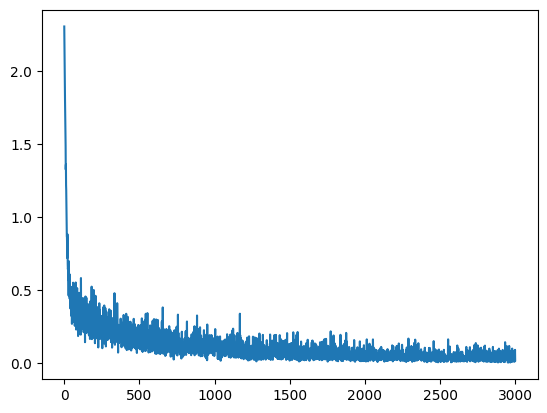

In [28]:
plt.plot(losses_train)

In [29]:
# test the model
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')


accuracy = 97.73


In [25]:
errors = []
with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for images,labels in test_loader:
        found = False
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
        wrong = (predictions != labels).nonzero()
        for i in wrong:
            errors.append((images[i].reshape(28,28).cpu().numpy(),predictions[i],labels[i]))


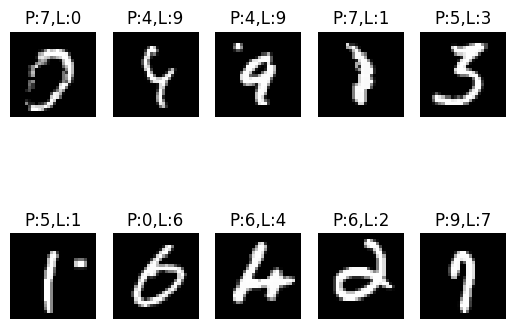

In [26]:
# plot the errors, take 10 random errors
import random
num_show = 10
random.shuffle(errors)
sample_errors = errors[:num_show]
for i in range(len(sample_errors)):
    plt.subplot(2,5,i+1)
    plt.imshow(errors[i][0],cmap='gray')
    plt.title(f'P:{errors[i][1].item()},L:{errors[i][2].item()}')
    plt.axis('off')


Vgg predilige filtri piccoli con più layer. Uno stack di due 3x3 conv ha lo stesso effetto di un 5x5


tre 3x3 conv hanno lo stesso effetto di un 7x7

Google net, aumenta numero livelli conv complicando architettura. Sono stati introdotti i livelli inception. Lascio alla rete a scegliere che tipo di filtro usare (che dimensione del kernel). L'input viene dato a diversi con layer con diversi valori di kernel size (questo in parallelo). Dopo ciò viene posto un filter concatenation layer. Riduce il numero di parametri rispetto a VGG


<img src="https://media5.datahacker.rs/2018/11/Featured-Image-017-CNN-Inception-Network-1.jpg" alt="alt text" title="Inception layer" />

Resnet: aumentare profondità per aumentare le prestazioni. 

- Usa massicciamente layer di batchnormalization
- usa le skip connection: connessioni in cui l'input di un certo blocco è sommato all'output del blocco, divenendo nuovo input del blocco successivo. Per risolvere il problema del vanishing gradient

Batch normalization: tenta di risolvere il fatto che un input voglio normalizzarlo per evitare che i valori assoluti dell'input cambiano ma non cambia la distribuzione (cambio i pesi della rete ma non riesco a estrarre le feature). AlexNet fa questo con LRN (local response normalization) (l'input di un livello è ottenuto normalizzando l'output del livello precedente) (intra channel: pixel nello stesso canale, accross channel: sui diversi canali) questo tipo di normalizzazione è poco efficiente, migliore è la batch normalization. Si applica al singolo batch. Risolve il problema del co-variate shift (se ho una distribuzione di punti, la mia rete si addestra sulla distribuzione in quell'intervallo, nel caso di inferenza potrei avere la stessa distribuzione ma su un intervallo diverso). Normalizzo sui valori assoluti mantenendo costante la distribuzione, usa la formula:

<img src="https://i.stack.imgur.com/KyHhK.png" >

Altero i valori assoluti non modificando le distribuzioni!
Cona la batchnormalization la rete può far sì che l'alterazione dei colori non sia determinante (trovare gatti bianchi o neri è meno importante, sarà più rilevante il modo in cui il colore è distribuito. Anche se la rete non ha visto gatti neri sarà in grado di riconoscerli). 

### Skip connections

La somma avviene prima subito prima dell'ultima funzione di attivazione. 

<img src="https://idiotdeveloper.com/wp-content/uploads/2021/09/residual_block_explained.png">

i tensori devono avere la stessa shape, quindi devo parametrizzare le convoluzioni per farle avere la stessa shape (se non è possibile direttamente nel ramo principale si può aggiungere un conv layer nel ramo di sikip)

Per fare il freezing dei pesi itero su i parametri e metto requires_grad a false

        for param in model.parameters():
            param.requires_grad = False

La log softmax permette di simulare una distribuzione di probabilità (sommatoria per tutti gli output deve essere pari a 1) + funzione logaritmica